### Self Project on Heart failure clinical records

In [2]:
# Importing all the required modules
import numpy as np
import pandas as pd
from sklearn import linear_model, svm, dummy, metrics, neural_network
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV
from sklearn.decomposition import PCA

# Importing the data frame downloaded from Kaggle
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
# Separating features and Target variable from data frame to matrix/array
X = np.matrix(df)
X = X[:, 0:12]
y = np.array(df['DEATH_EVENT'])
X.shape, y.shape

((299, 12), (299,))

In [4]:
# Sample Check of the variable data types and their entries
print(X,'\n',y,'\n',df.columns)
df.head()

[[7.500e+01 0.000e+00 5.820e+02 ... 1.000e+00 0.000e+00 4.000e+00]
 [5.500e+01 0.000e+00 7.861e+03 ... 1.000e+00 0.000e+00 6.000e+00]
 [6.500e+01 0.000e+00 1.460e+02 ... 1.000e+00 1.000e+00 7.000e+00]
 ...
 [4.500e+01 0.000e+00 2.060e+03 ... 0.000e+00 0.000e+00 2.780e+02]
 [4.500e+01 0.000e+00 2.413e+03 ... 1.000e+00 1.000e+00 2.800e+02]
 [5.000e+01 0.000e+00 1.960e+02 ... 1.000e+00 1.000e+00 2.850e+02]] 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# Feature Preprocessing and Train-Test-Split
scaler = StandardScaler()
poly = PolynomialFeatures(degree = 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((224, 12), (75, 12), (224,), (75,))

In [7]:
# Principal Component Analysis of scaled features
pca = PCA(n_components = 2).fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_pca.shape

(224, 2)

<IPython.core.display.Javascript object>


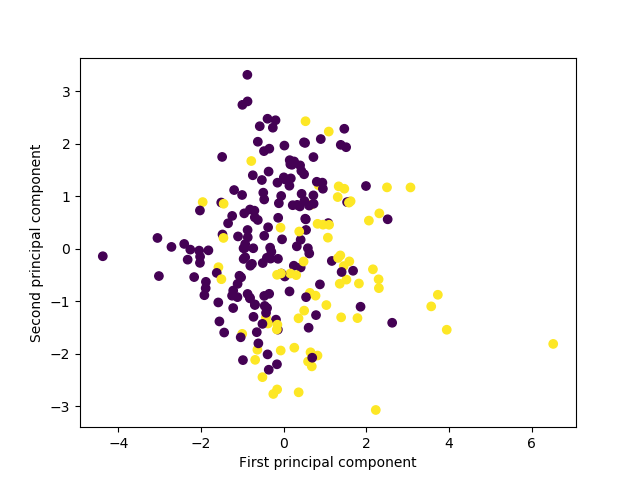

In [8]:
# Visualising for any clustering/separation in the labelled training examples after pca
%matplotlib notebook
import matplotlib.pyplot as plt
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()
    

In [10]:
# Fitting Logistic Regression and Support Vector Machines with RBF and Linear kernels
lr1 = linear_model.LogisticRegression(C = 1).fit(X_train_scaled, y_train)
lr2 = linear_model.LogisticRegression(C = 0.1).fit(X_train_poly, y_train)
sv1 = svm.SVC(gamma = 0.1, C = 1).fit(X_train_scaled, y_train)
sv2 = svm.SVC(kernel='linear', C = 1).fit(X_train_scaled, y_train)

# Dummy Classifier for baseline
dm1 = dummy.DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

# Comparing the accuracies of these models
print('Logistic Regression\nTraining accuracy = {}\tTest Accuracy = {}\n'.format(lr1.score(X_train_scaled, y_train), lr1.score(X_test_scaled, y_test)))
print('Logistic Regression (poly)\nTraining accuracy = {}\tTest Accuracy = {}\n'.format(lr2.score(X_train_poly, y_train), lr2.score(X_test_poly, y_test)))
print('SVM RBF\nTraining accuracy = {}\tTest Accuracy = {}\n'.format(sv1.score(X_train_scaled, y_train), sv1.score(X_test_scaled, y_test)))
print('SVM Linear\nTraining accuracy = {}\tTest Accuracy = {}\n'.format(sv2.score(X_train_scaled, y_train), sv2.score(X_test_scaled, y_test)))
print('Dummy Classifier\nTraining accuracy = {}\tTest Accuracy = {}\n'.format(dm1.score(X_train_scaled, y_train), dm1.score(X_test_scaled, y_test)))

# Obtaining the Confusion Matrices
y_lr = lr1.predict(X_test_scaled)
y_sv = sv1.predict(X_test_scaled)
y_lsv = sv2.predict(X_test_scaled)
confusion_lr = metrics.confusion_matrix(y_test, y_lr)
confusion_sv = metrics.confusion_matrix(y_test, y_sv)
confusion_lsv = metrics.confusion_matrix(y_test, y_lsv)
print('Logistic Regression\n{}\n'.format(confusion_lr))
print('SVM RBF\n{}\n'.format(confusion_sv))
print('SVM Linear\n{}\n'.format(confusion_lsv))

# Checking the F1 Score and Recall of SVM with RBF Kernal
print('Logistic Regression\n F1 score = {}\t recall = {}\n'.format(metrics.f1_score(y_test, y_lr), metrics.recall_score(y_test, y_lr)))
print('SVM RBF\n F1 score = {}\t recall = {}\n'.format(metrics.f1_score(y_test, y_sv), metrics.recall_score(y_test, y_sv)))
print('SVM Linear\n F1 score = {}\t recall = {}\n'.format(metrics.f1_score(y_test, y_lsv), metrics.recall_score(y_test, y_lsv)))

Logistic Regression
Training accuracy = 0.8660714285714286	Test Accuracy = 0.7733333333333333

Logistic Regression (poly)
Training accuracy = 0.8883928571428571	Test Accuracy = 0.8

SVM RBF
Training accuracy = 0.9151785714285714	Test Accuracy = 0.8133333333333334

SVM Linear
Training accuracy = 0.8526785714285714	Test Accuracy = 0.7866666666666666

Dummy Classifier
Training accuracy = 0.6919642857142857	Test Accuracy = 0.64

Logistic Regression
[[44  4]
 [13 14]]

SVM RBF
[[45  3]
 [11 16]]

SVM Linear
[[45  3]
 [13 14]]

Logistic Regression
 F1 score = 0.6222222222222222	 recall = 0.5185185185185185

SVM RBF
 F1 score = 0.6956521739130435	 recall = 0.5925925925925926

SVM Linear
 F1 score = 0.6363636363636364	 recall = 0.5185185185185185



___Out of these models, SVM Radial Basis Function shows the best results. So, let's focus on it.___

<IPython.core.display.Javascript object>


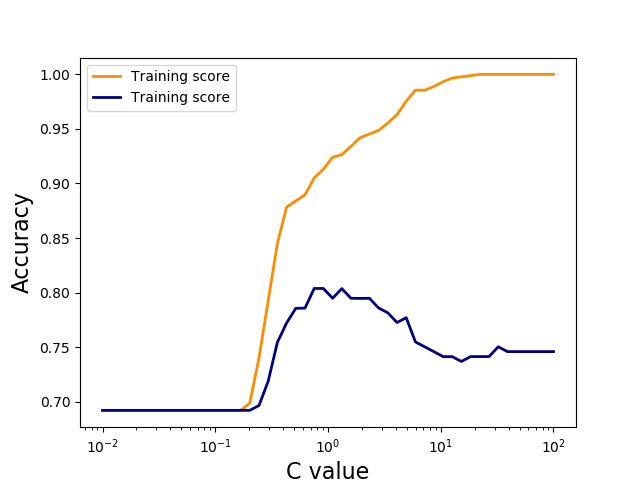

In [11]:
# Validation curve for SVM Radial Basis Function
my_C = np.logspace(-2, 2)
train_scores, test_scores = validation_curve(svm.SVC(kernel='rbf', gamma = 0.1), X_train_scaled, y_train, cv = 5, param_name = 'C', param_range = my_C)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.semilogx(my_C, train_scores_mean, label='Training score',color='darkorange', lw=2)
plt.semilogx(my_C, test_scores_mean, label='Training score',color='navy', lw=2)
plt.xlabel('C value', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(loc='best')
plt.show()

___From the Valdation Curve, it appears that the best possible accuracies are obtained when C is near about 2.___

<IPython.core.display.Javascript object>


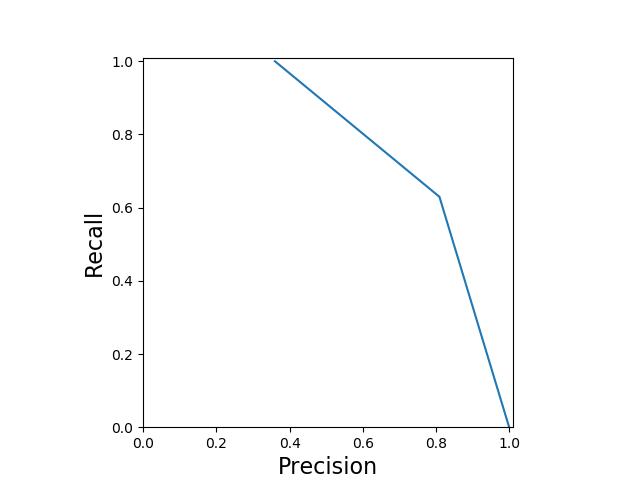

C:\Users\AP Mankar\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


In [12]:
# Precision-Recall Curve for C = 2
sv3 = svm.SVC(kernel='rbf', C = 2, gamma = 0.1).fit(X_train_scaled, y_train)
y_sv3 = sv3.predict(X_test_scaled)
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_sv3)
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [13]:
# Model Predictions and Confusion Matrix for C = 2 RBF SVM
confusion_sv3 = metrics.confusion_matrix(y_test, y_sv3)
print('Model Predictions\n{}\n'.format(y_sv3))
print('Confusion Matrix\n{}\n'.format(confusion_sv3))
print('SVM RBF C = 2\nTraining accuracy = {}\tTest Accuracy = {}\n'.format(sv3.score(X_train_scaled, y_train), sv3.score(X_test_scaled, y_test)))
print('SVM RBF C = 2\nF1 score = {}\t recall = {}\t precision = {}\n'.format(metrics.f1_score(y_test, y_sv3), metrics.recall_score(y_test, y_sv3), metrics.precision_score(y_test, y_sv3)))

Model Predictions
[0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 1]

Confusion Matrix
[[44  4]
 [10 17]]

SVM RBF C = 2
Training accuracy = 0.9330357142857143	Test Accuracy = 0.8133333333333334

SVM RBF C = 2
F1 score = 0.7083333333333334	 recall = 0.6296296296296297	 precision = 0.8095238095238095



### Hence, at the default train-test-split of (75%-25%), by using the Support Vector Machine Algorithm with Radial Basis Function Kernel, we can predict whether a person will die by Heart failure or not with an accuracy of 81%, precision of 81% and recall of 63%

#### The limit to the accuracy might be because of the small size of the data available